<center><H2>EE 679 Speech Processing</H2>
<H2>Computing Assignment 1: Signal synthesis and DTFT based analysis</H2>
<H2>Praveen Agrawal</H2>
<H2>12D020030</H2></center>

In [63]:
%matplotlib inline
from __future__ import division
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import write

<i><b>Question 1.</b> Given the following specification for a single-formant resonator, obtain the transfer function of the filter
H(z) from the relation between resonance frequency and bandwidth, and the pole radius and angle. Plot
its magnitude response (dB magnitude versus frequency) and impulse response.
F1 (formant) = 1 kHz
B1(bandwidth) = 200 Hz
Fs (sampling freq) = 16 kHz</i>

In [5]:
# QUESTION 1
# ----------

F1 = 1000	#1kHz formant frequency
B1 = 200	#200 Hz Bandwidth
Fs = 16000	#16kHz Sampling frequency

r = np.exp(-B1*pi/Fs)	#Pole radius
theta = 2*pi*F1/Fs		#Pole angle

NameError: name 'np' is not defined

<center><i>Frequency Response is written as</i></center><br>

$$ H(z) = \dfrac{[b0 + b1*z^-1 + b2*z^-2 + ... + bm*z^-m]}{[a0 + a1*z^-1 + a2*z^-2 + ... + an*z^-n]}
\end{align*} $$


<br><center><i>In our case it is</i></center><br>
\begin{align}
H(z) = \dfrac{b0}{a0 + a1*z^-1 + a2*z^-2}
\end{align}


In [6]:
b = [1]		#Array for numerator coefficients of H(z)
a = [1, -r*np.exp(-1j*theta)-r*np.exp(1j*theta), r*r]	#Array for denominator coefficients of H(z)
w, h = signal.freqz(b,a)	#Compute the frequency response [Source: Scipy Documentation]

fig = plt.figure()
plt.title('Frequency Response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude in dB', color='b')
plt.xlabel('Frequency in rad/sample')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.show()

NameError: name 'r' is not defined

<br><i>Impulse response can be obtained by converting H(z) to the difference equation.
Hence, 
</i>
\begin{align}
x[n] = a0*y[n] + a1*y[n-1] + a2*y[n-2]
\end{align}
<br>

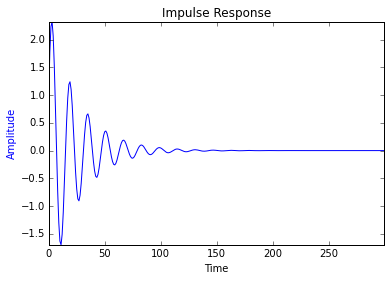

In [66]:
#Impulse Response
#Converting H(z) to the difference equation to get the impulse response

x = np.zeros(300)	
x[0] = 1	#Delta function input to get impulse response
y = np.zeros(300)
n=range(300)
y[0] = x[0]
y[1] = x[1] - a[1].real*y[0]		# a[0] not written since a[0] = 1
for i in range(2, 300):
	y[i] = x[i] - a[1].real*y[i-1] - a[2].real*y[i-2]
fig = plt.figure()
plt.title('Impulse Response')
ax1 = fig.add_subplot(111)
plt.plot(n, y, 'b')
plt.ylabel('Amplitude', color='b')
plt.xlabel('Time')
plt.axis('tight')
plt.show()

<hr><br><i><b>Question 2.</b> Excite the above resonator (“filter”) with a source given by an impulse train of F0 = 150 Hz. Compute the
output of the source-filter system over the duration of 0.5 second using the difference equation
implementation of the LTI system. Plot the time domain waveform over a few pitch periods so that you
can observe waveform characteristics. Play out the 0.5 sec duration sound and comment on the sound
quality.<i>

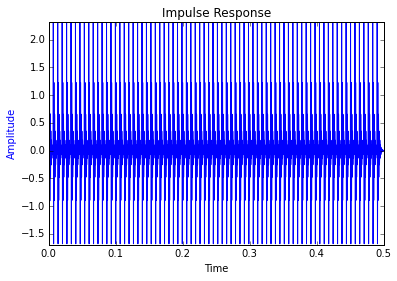

In [67]:
F0 = 150   #150 Hz
duration = 0.5
time = np.linspace(0, duration, duration*Fs)
x = np.zeros(int(duration*Fs))
y = np.zeros(int(duration*Fs))

for i in range(0, int(duration*F0)):
    x[i*int(np.floor(Fs/F0))]=1

y[0] = x[0]
y[1] = x[1] - a[1].real*y[0]		# a[0] not written since a[0] = 1
for i in range(2, int(duration*Fs)):
	y[i] = x[i] - a[1].real*y[i-1] - a[2].real*y[i-2]

fig = plt.figure()
plt.title('Impulse Response')
ax1 = fig.add_subplot(111)
plt.plot(time, y, 'b')
plt.ylabel('Amplitude', color='b')
plt.xlabel('Time')
plt.axis('tight')
plt.show()

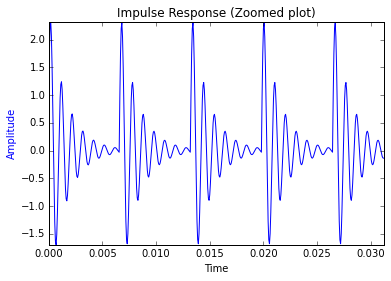

In [68]:
fig = plt.figure()
plt.title('Impulse Response (Zoomed plot)')
ax1 = fig.add_subplot(111)
time1 = time[range(0,500)]
y1 = y[range(0,500)]
plt.plot(time1, y1, 'b')
plt.ylabel('Amplitude', color='b')
plt.xlabel('Time')
plt.axis('tight')
plt.show()

In [69]:
y = np.int16(y/np.max(np.abs(y))*32767)
write("audio_2.wav",16000,y)

<i>The audio heard was a constant low pitched sound and was a little rough in quality.</i><br><hr>

<i><b>Question 3.</b> Vary the parameters as indicated below and comment on the differences in waveform and sound quality
for the different parameter combinations.
(a) F0 = 120 Hz, F1 = 300 Hz, B1 = 100 Hz
(b) F0 = 120 Hz, F1=1200 Hz, B1 = 200 Hz
(c) F0 = 180 Hz, F1 = 300 Hz, B1 = 100 Hz</i>

<b>Solution</b>
The above codes were executed separately for the given parameters and the plots obtained are displayed below:

<i>(a) F0 = 120 Hz, F1 = 300 Hz, B1 = 100 Hz</i>
<img src="3_a_1.png">
<img src="3_a_2.png">

<i>(b) F0 = 120 Hz, F1 = 1200 Hz, B1 = 200 Hz</i>
<img src="3_b_1.png">
<img src="3_b_2.png">

<i>(c) F0 = 180 Hz, F1 = 300 Hz, B1 = 100 Hz</i>
<img src="3_c.png">
<img src="3_c_2.png">

Looking at the three waveforms and their corresponding bandwidth values we can directly see a correlation between the bandwidth and the decay rate of the waveform. With the increase in bandwidth in subpart 'b' the decay rate has increased. Because of this there is far lesser interference in subpart 'b' as compared to the other 2 parts. Same is observed consistently with the result of question 2. 

The 1st and the 3rd waveforms appear to sound alike whereas the 2nd waveform is totally distinct from the other two. However, the 1st waveform appears to be a little rougher as compared to the 3rd waveform.<hr>

<i><b>Question 4.</b> In place of the simple single-resonance signal, synthesize the following more realistic vowel sounds at
two distinct pitches (F0 = 120 Hz, F0 = 220 Hz). Keep the bandwidths constant at 50 Hz for all
formants. Duration of sound: 0.5 sec <br>
Vowel F1, F2, F3 <br>
/a/ 730, 1090, 2440<br>
/i/ 270, 2290, 3010<br>
/u/ 300, 870, 2240<i>

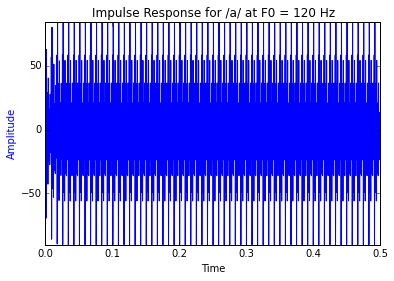

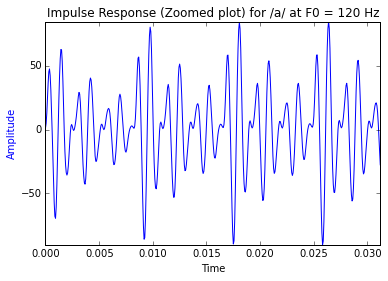

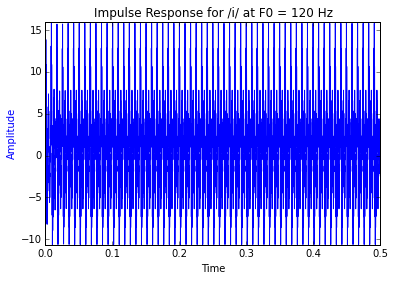

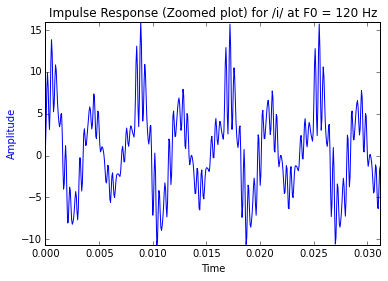

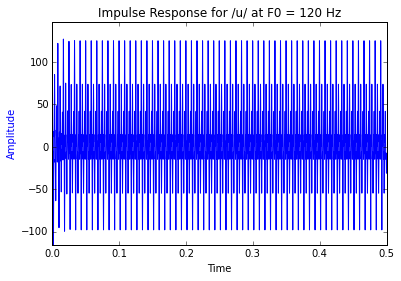

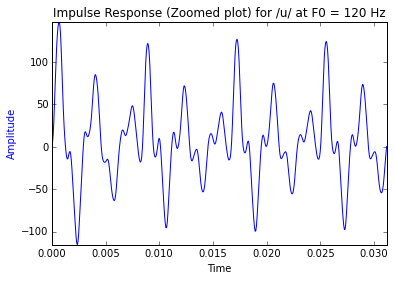

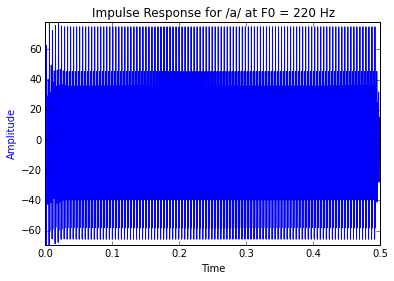

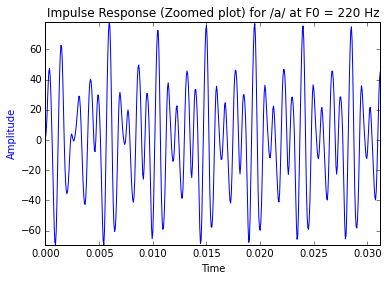

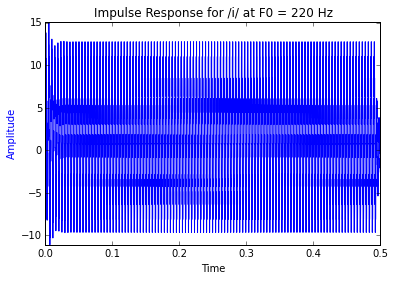

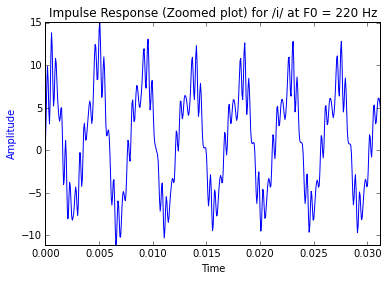

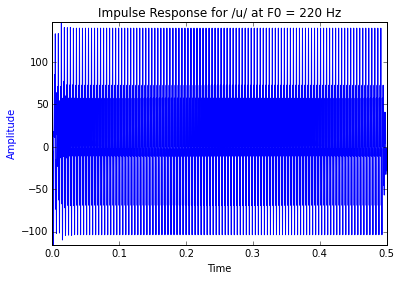

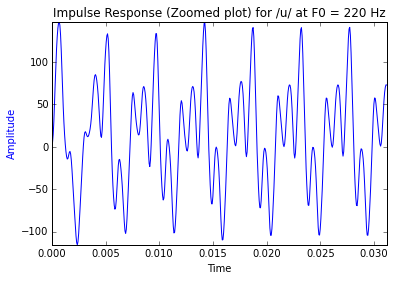

In [80]:
def vowel(F0, F1, F2, F3):
	B = 50
	Fs = 16000
	duration = 0.5
	r = np.exp(-B*pi/Fs)	#Pole radius
	theta = [2*pi*F1/Fs, 2*pi*F2/Fs, 2*pi*F3/Fs]
	time = np.linspace(0, duration, duration*Fs)
	a1 = [1, -r*np.exp(-1j*theta[0])-r*np.exp(1j*theta[0]), r*r]
	a2 = [1, -r*np.exp(-1j*theta[1])-r*np.exp(1j*theta[1]), r*r]
	a3 = [1, -r*np.exp(-1j*theta[2])-r*np.exp(1j*theta[2]), r*r]
	x = np.zeros(int(duration*Fs))
	y = np.zeros(int(duration*Fs))
	temp1 = np.zeros(int(duration*Fs))
	temp2 = np.zeros(int(duration*Fs))
	for i in range(0, int(duration*F0)):
		x[i*int(np.floor(Fs/F0))] = 1
  
	temp1[0] = x[0]
	temp1[1] = x[1] - a1[1].real*temp1[0]	# a1[0] not written since a1[0] = 1
	for i in range(2, int(duration*Fs)):
			temp1[i] = x[i] - a1[1].real*temp1[i-1] - a1[2].real*temp1[i-2]
	
	temp2[0] = temp1[0]
	temp2[1] = temp1[1] - a2[1].real*temp2[0]	# a2[0] not written since a2[0] = 1
	for i in range(2, int(duration*Fs)):
			temp2[i] = temp1[i] - a2[1].real*temp2[i-1] - a2[2].real*temp2[i-2]
		
	y[0] = temp2[0]
	y[1] = temp2[1] - a3[1].real*y[0]	# a3[0] not written since a3[0] = 1
	for i in range(2, int(duration*Fs)):
			y[i] = temp2[i] - a3[1].real*y[i-1] - a3[2].real*y[i-2]
		
    #Just for axis labeliing
	if(F1 ==730):
		phone = 'a'
	elif (F1==270):
		phone = 'i'
	elif (F1==300):
		phone = 'u'   
	fig = plt.figure()
	plt.title('Impulse Response for /'+phone+'/ at F0 = '+str(F0)+' Hz')
	ax1 = fig.add_subplot(111)
	plt.plot(time, y, 'b')
	plt.ylabel('Amplitude', color='b')
	plt.xlabel('Time')
	plt.axis('tight')
	plt.show()

	fig = plt.figure()
	plt.title('Impulse Response (Zoomed plot) for /'+phone+'/ at F0 = '+str(F0)+' Hz')
	ax1 = fig.add_subplot(111)
	time1 = time[range(0,500)]
	y1 = y[range(0,500)]
	plt.plot(time1, y1, 'b')
	plt.ylabel('Amplitude', color='b')
	plt.xlabel('Time')
	plt.axis('tight')
	plt.show()
	y = np.int16(y/np.max(np.abs(y))*32767)
	write("audio_\'"+phone+'\'_'+str(F0)+"Hz.wav",16000,y)
	return y
		
vowel(120, 730, 1090, 2440);
vowel(120, 270, 2290, 3010);
vowel(120, 300, 870, 2240);
vowel(220, 730, 1090, 2440);
vowel(220, 270, 2290, 3010);
vowel(220, 300, 870, 2240);



The audio files obtained upon the above vowel synthesization do sound close to the original vowel sounds.
<hr>

<i> <b> Question 5. </b> Signal Analysis:
Compute the DTFT magnitude (dB) spectrum of any 2 of the vowel sounds you have synthesized in Q3.
Use rectangular and Hamming windows of lengths: 10 ms, 20 ms, 40 ms, each with a large zero-padded
DFT. (i) Comment on the similarities and differences between the different spectra. (ii) Estimate the
signal parameters from each of the magnitude spectra and compare with the ground-truth.</i>

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


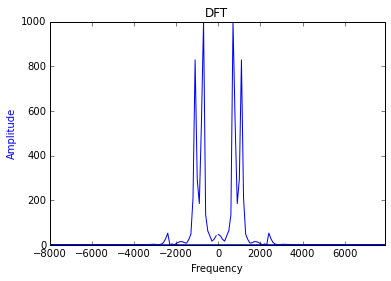

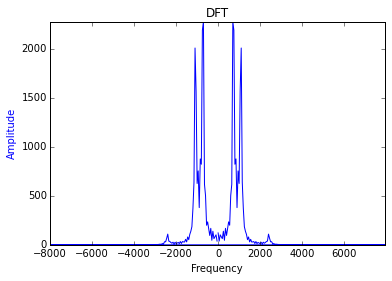

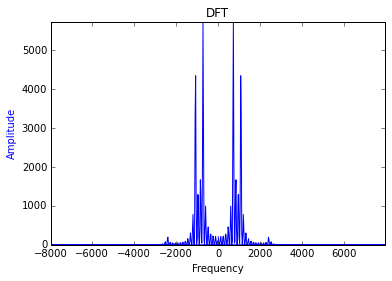

C:\Users\PraveenAgrawal\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


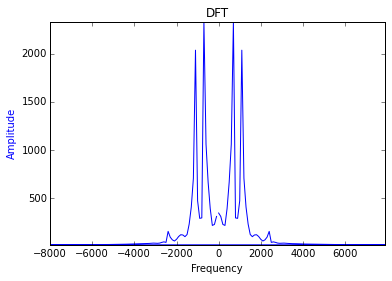

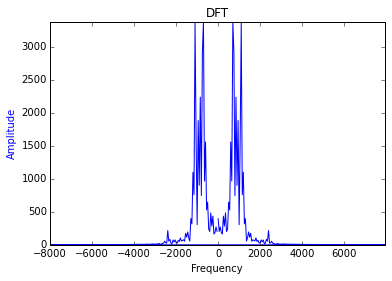

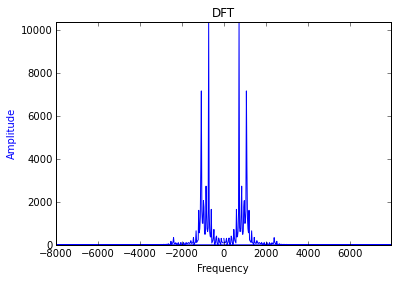

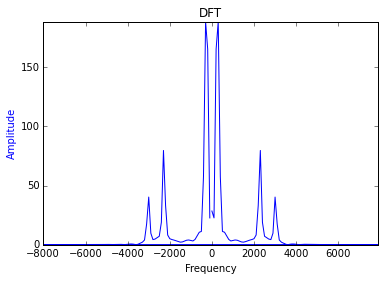

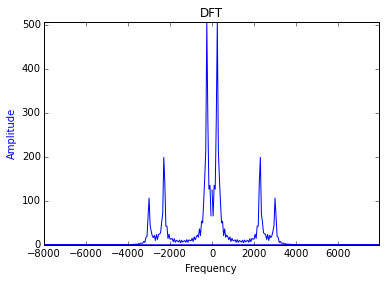

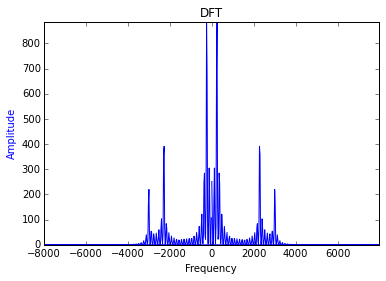

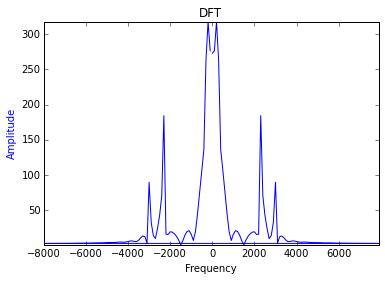

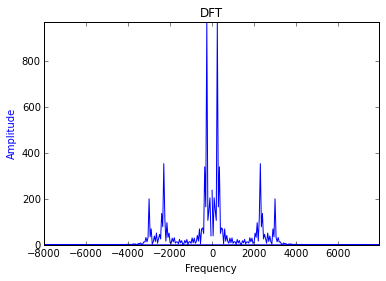

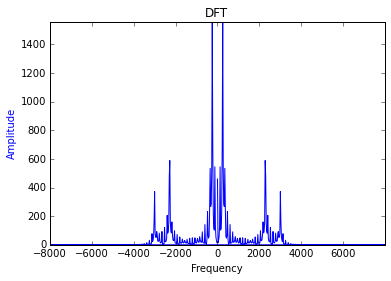

In [78]:
def dft(F0, F1, F2, F3, WindowType, WindowLength):
	y = vowel(F0, F1, F2, F3);
	output = np.zeros(WindowLength*Fs)
	if(WindowType == 'Hamming'):
		Window = y[0:WindowLength*Fs] * np.hamming(WindowLength*Fs)
	elif(WindowType == 'Rectangular'):
		Window = y[0:WindowLength*Fs]*np.ones(WindowLength*Fs)
	else:
		print('Invalid input')
		exit();
	ft = np.abs(np.fft.fft(Window))
	f = np.fft.fftfreq(ft.shape[0], 1/Fs)
	fig = plt.figure()
	plt.title('DFT')
	ax1 = fig.add_subplot(111)
	plt.plot(f, ft, 'b')
	plt.ylabel('Amplitude', color='b')
	plt.xlabel('Frequency')
	plt.axis('tight')
	plt.show()
    

# /a/ at 120 Hz
dft(120, 730, 1090, 2440, 'Hamming', 10/1000)
dft(120, 730, 1090, 2440, 'Hamming', 20/1000)
dft(120, 730, 1090, 2440, 'Hamming', 40/1000)
dft(120, 730, 1090, 2440, 'Rectangular', 10/1000)
dft(120, 730, 1090, 2440, 'Rectangular', 20/1000)
dft(120, 730, 1090, 2440, 'Rectangular', 40/1000)
dft(120, 270, 2290, 3010, 'Hamming', 10/1000)
dft(120, 270, 2290, 3010, 'Hamming', 20/1000)
dft(120, 270, 2290, 3010, 'Hamming', 40/1000)
dft(120, 270, 2290, 3010, 'Rectangular', 10/1000)
dft(120, 270, 2290, 3010, 'Rectangular', 20/1000)
dft(120, 270, 2290, 3010, 'Rectangular', 40/1000)




We can see that the spectra gets smoother with decreasing window length. This affects the pitch of the signal which is better preserved in with the larger window length. Also, the spectra obtained with the rectangular windows are smoother as compared to the corresponding ones obtained with the hamming windows. The peaks are broader and hence less precise with Hamming windows as compared to the ones with rectangular windows.

Estimate of the formant frequencies:<br>
<u>/a/ at F0 = 120 Hz, F1 = 730Hz, F2 = 1090Hz, F3  = 2440Hz</u><br>
<i><u>Rectangular Window</u><i><br>
Window Length = 10ms,   F1 = 701 Hz,   F2 = 1098 Hz,   F3 = 2401 Hz<br>
Window Length = 20ms,   F1 = 700 Hz,   F2 = 1098 Hz,   F3 = 2397 Hz<br>
Window Length = 40ms,   F1 = 732 Hz,   F2 = 1073 Hz,   F3 = 2400 Hz<br>
<i><u>Hamming Window</u><i><br>
Window Length = 10ms,   F1 = 704 Hz,   F2 = 1095 Hz,   F3 = 2425 Hz<br>
Window Length = 20ms,   F1 = 727 Hz,   F2 = 1098 Hz,   F3 = 2399 Hz<br>
Window Length = 40ms,   F1 = 724 Hz,   F2 = 1076 Hz,   F3 = 2400 Hz<br>
<br>
<u>/i/ at F0 = 120 Hz, F1 = 270Hz, F2 = 2290Hz, F3  = 3010Hz</u><br>
<i><u>Rectangular Window</u><i><br>
Window Length = 10ms,   F1 = 202 Hz,   F2 = 2300 Hz,   F3 = 2999 Hz<br>
Window Length = 20ms,   F1 = 250 Hz,   F2 = 2299 Hz,   F3 = 2999 Hz<br>
Window Length = 40ms,   F1 = 250 Hz,   F2 = 2276 Hz,   F3 = 3000 Hz<br>
<i><u>Hamming Window</u><i><br>
Window Length = 10ms,   F1 = 295 Hz,   F2 = 2298 Hz,   F3 = 3000 Hz<br>
Window Length = 20ms,   F1 = 245 Hz,   F2 = 2299 Hz,   F3 = 3000 Hz<br>
Window Length = 40ms,   F1 = 250 Hz,   F2 = 2274 Hz,   F3 = 3000 Hz<br>